In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import pickle as pickle 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


data_dir = '/content/drive/MyDrive/flow'

categories = ['daisy', 'dandelion' , 'rose', 'sunflower', 'tulip']

data = []

def make_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)

        for img_name in os.listdir(path):
            image_path = os.path.join(path, img_name)
            image = cv2.imread(image_path)


            try:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (72,72))
                image = np.array(image)

                data.append([image, label])

            except Exception as e:
                pass

    print(len(data))
    pik = open('flower.pickle','wb')
    pickle.dump(data, pik)
    pik.close()
make_data()
def load_data():
    pick  = open('flower.pickle', 'rb')
    data = pickle.load(pick)

    pick.close()

#np.random(data)

    feature = []
    labels = []

    for img, label in data:
        feature.append(img)
        labels.append(label)

    feature = np.array(feature, dtype = np.float32)
    feature = feature/ 255.

    labels = np.array(labels)

    return [feature, labels]


4308


In [ ]:
feature,label = load_data()
categories = ['daisy', 'dandelion' , 'rose', 'sunflower', 'tulip']
x_train, x_test, y_train, y_test = train_test_split(feature,label,test_size=0.2,shuffle=True)
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train))
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)
train_dataset=train_dataset.batch(batch_size=16)


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',input_shape=[72, 72, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))


cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))


cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))


cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))


cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))

cnn.add(tf.keras.layers.Flatten())


In [ ]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)
cnn.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cnn.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 20)

Epoch 1/20
108/108 [==============================] - 10s 84ms/step - loss: 1.6028 - accuracy: 0.2411 - val_loss: 1.5632 - val_accuracy: 0.2715
Epoch 2/20
108/108 [==============================] - 9s 84ms/step - loss: 1.3856 - accuracy: 0.3796 - val_loss: 1.2546 - val_accuracy: 0.4617
Epoch 3/20
108/108 [==============================] - 9s 85ms/step - loss: 1.2093 - accuracy: 0.4594 - val_loss: 1.4352 - val_accuracy: 0.4176
Epoch 4/20
108/108 [==============================] - 10s 89ms/step - loss: 1.1700 - accuracy: 0.4942 - val_loss: 1.1320 - val_accuracy: 0.5278
Epoch 5/20
108/108 [==============================] - 9s 82ms/step - loss: 1.1100 - accuracy: 0.5435 - val_loss: 1.1584 - val_accuracy: 0.5360
Epoch 6/20
108/108 [==============================] - 9s 88ms/step - loss: 1.0414 - accuracy: 0.5795 - val_loss: 0.9962 - val_accuracy: 0.5835
Epoch 7/20
108/108 [==============================] - 9s 81ms/step - loss: 0.9779 - accuracy: 0.6138 - val_loss: 1.0540 - val_accuracy: 0.59

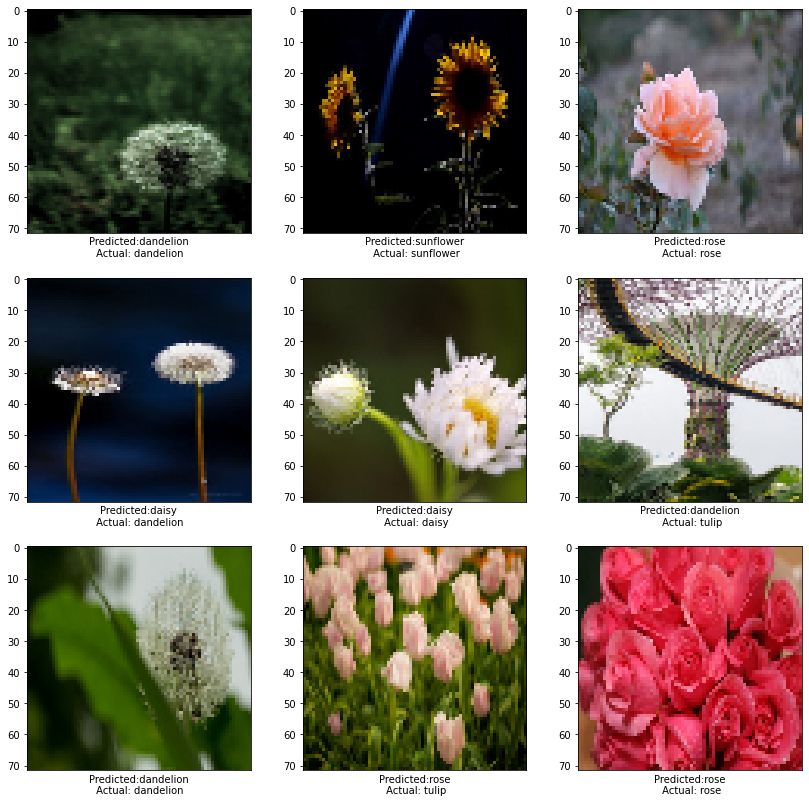

In [ ]:
prediction = cnn(x_test[0:9])
plt.figure(figsize=(14,14))

for i in range(9):
   plt.subplot(3,3,i+1)
   plt.imshow(x_test[i])
   plt.xlabel('Predicted:%s\n Actual: %s'%(categories[np.argmax(prediction[i])],
              categories[y_test[i]]))
   
   plt.xticks([])
plt.show()   


In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/flow/tulip/100930342_92e8746431_n.jpg', target_size=(72,72,3))

import tensorflow as tf
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions =cnn.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to tulip with a 40.46 percent confidence.


In [ ]:
accuracy, top_5_accuracy = cnn.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")


27/27 [==============================] - 1s 28ms/step - loss: 1.1051 - accuracy: 0.6868
Test accuracy: 110.51%
Test top 5 accuracy: 68.68%
